# IA Paper 3 - Linear circuits - Examples paper 3

## RC Filters

RC filters are widely used to filter out unwanted noise from signals. We might, e.g., want to measure a slowly varying signal from a temperature sensor but the mains supply introduces a 50 Hz signal on top of the temperature measurement. We could employ a low pass filter which only allows signals up to a certain frequency, say 30 Hz, to pass.
Figures below shows two simple RC filters, which are essentially frequency dependent voltage dividers.

High pass filter:
![High Pass Filter](https://raw.githubusercontent.com/CambridgeEngineering/Part-IA-ExamplesPapers-Python/master/paper3/linear-circuits-and-devices/high-pass.png)

Low pass filter:
![Low Pass Filter](https://raw.githubusercontent.com/CambridgeEngineering/Part-IA-ExamplesPapers-Python/master/paper3/linear-circuits-and-devices/low-pass.png)

Let us explore how the output voltage varies with frequency. The frequency de-pended impedance of the capacitors is $X_{C} = 1/(j \omega C)$, hence the output voltage of the high pass filter across the resistor is

$$
V_{out} = \frac{R}{R + X_{C}} V_{in}
$$

Find a similar equation for the low pass filter.  

At low frequencies $X_{C}$ tends to infinity, but as the frequency increases the impedance decreases, tending towards zero as the frequency tends to infinity. At an angular frequency $\omega = 1/(RC)$ $|X_{C}| = R$ or $X_{C} = -jR$. Therefore, at high frequencies the voltage gain $V_{out}/V_{in}$ of a high pass filter is ≈1. When the angular frequency decreases to $\omega_{0}$ the magnitude of the voltage gain drops to $1/\sqrt{2}$ of the high frequency value. Similarely, for a low pass filter the voltage gain drops from unity at low frequencies to $1/\sqrt{2}$ as the angular frequency increases to $\omega_{0}$. The angular
frequency $\omega_{0}$ is therefore called cut-off frequency.

The power associated with $V_{out}$ is $P_{out} \propto V_{out}^{2}$, hence when $V_{out}$ reaches $1/\sqrt{2}$ of its maximum value at $\omega_{0}$  the output power drops to $1/2$ of its maximum value. Power gain ($P_{out}/P_{in}$) is frequently expressed in decibels (dB) which is defined as 

$$
Gain_{Power;dB} = 10\log_{10}(GainPower)
$$

i.e. a reduction of power gain by a factor of 2 corresponds to a power gain of -3 dB and an increase of power gain by a factor of 100 corresponds to a power gain of 20 dB.

We can now plot the frequency response of the high and low pass filters as function of frequency on a linear and logarithmic scale using NumPy. Let us define R=1e3 and C=160e-9 for both filters. We can then calculate the voltage gain of the high pass filter over a frequency range from 0 to 10 kHz as
```python
f = np.linspace(0, 10000, 100)
omega = 2*pi*f
X_c = 1/(1i*omega*C)
gain_V = R/(R+X_c)`
```
Plot the absolute value of gain V vs. f. Then, on a new figure, plot the power gain in dB vs the log of the frequency using:  
```python

ax = plt.gca()
ax.set_xscale('log')
```
It is also informative to plot the phase angle of gain V vs. frequency. What is the phase difference between input and output voltage at low and high frequencies and at $f_{0}$?

Investigate the frequency dependence of the low pass filter. Cascading a high and loss pass filter in series results in a band pass filter which is depicted in below. Find an expression for the output voltage as function of frequency and plot voltage gain, power gain in dB and phase as function of frequency. For the band pass filter use capacitor values $C_{1}$ = 800 nF $C_{2}$ = 32 nF and both resistor values R = 1000 ohm.

![BandPass Filter](https://raw.githubusercontent.com/CambridgeEngineering/Part-IA-ExamplesPapers-Python/master/paper3/linear-circuits-and-devices/band-pass.png)

### Solution

Import all relevant modules. Here, we will need `NumPy`, `PyPlot` from `matplotlib`.

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

# Special command for plotting inside a Jupyter notebook
%matplotlib inline

This exercise will involve a lot of plotting, so it is sensible to define a function that will do just that. For each filter we will create 3 plots: voltage gain vs. frequency, power gain vs. frequency and phase angle vs frequency. To work, the function will need three parameters: the frequency array, the voltage gain array and the type of the filter investigated (the latter needed for correct labelling).

In [2]:
def PlotFilterResponses(f, gain_V, filter_type):
    
    # Create plot of voltage gain vs frequency
    plt.figure()
    plt.plot(f, abs(gain_V))
    plt.title(filter_type)
    plt.xlabel("frequency / Hz")
    plt.ylabel("Voltage Gain")
    
    # Create plot of power gain vs log frequency
    plt.figure()
    plt.semilogx(f, 10*np.log10(abs(gain_V)**2))
    plt.title(filter_type)
    plt.xlabel("frequency / Hz")
    plt.ylabel("Power Gain / dB")
    
    # Create plot of power gain vs log frequency
    plt.figure()
    plt.plot(f, np.angle(gain_V)*180/np.pi)
    plt.title(filter_type)
    plt.xlabel("frequency / Hz")
    plt.ylabel("Phase Angle / deg")
    plt.ylim([-90,90])

Let's start with the high-pass filter. We need to introduce some variables, namely the R and C, as described in the instruction. We will also create the frequency array and compute the voltage gain array. 

In [3]:
f_h = np.linspace(1, 10000, 100)
omega_h = 2*np.pi*f_h
R_h = 1.0e3
C_h = 160.0e-9
X_c_h = 1/(1j*omega_h*C_h)

gain_V = R_h/(R_h + X_c_h)

Now we can call the function that will plot these results.

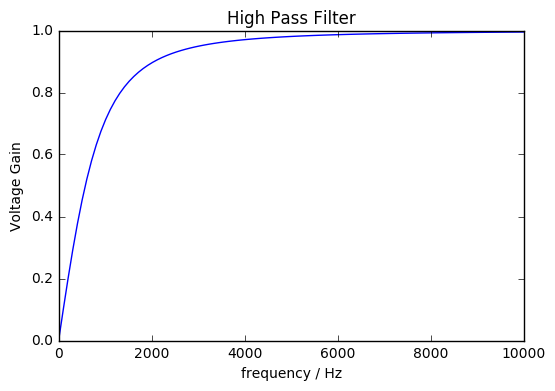

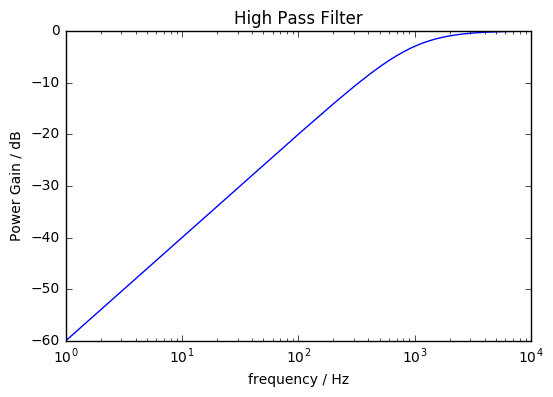

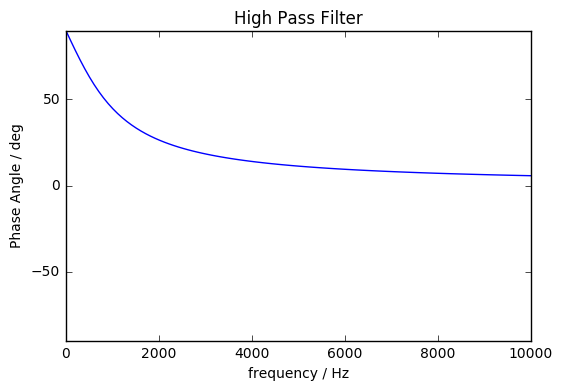

In [4]:
PlotFilterResponses(f_h, gain_V, "High Pass Filter") 

We could create our plots for the low-pass and band-pass filter in the same way, but a nifty way to do this would be to create a widget that lets us choose between the filters. Let's start with creating a definition of the function that will calculate the volatge gain 

In [5]:
def gain(method, omega):

    if method == 'High pass filter':
        # high-pass filter
        R = 1e3
        C = 160e-9
        X_c = 1/(1j*omega*C)
        # calculate gain
        gain_V = R/(R+X_c)
        return gain_V

    elif method == 'Low pass filter':
        # low-pass filter
        R = 1e3
        C = 160e-9
        X_c = 1/(1j*omega*C)
        # calculate gain
        gain_V = X_c/(R+X_c)
        return gain_V

    elif method == 'Band pass filter':
        # band-pass filter
        # low pass cutoff = 5kHz, R=1kOhm, C=32nF
        R2 = 1.0e3
        C2 = 32.0e-9

        # high pass cutoff = 0.2kHz, R=1kOhm, C=800nF
        R1 = 1e3
        C1 = 800e-9

        X_c1 = 1/(1j*omega*C1)
        X_c2 = 1/(1j*omega*C2)

        # calculate gain
        Z_par = R1*(R2+X_c2)/(R1+R2+X_c2)
        V_A = Z_par/(X_c1+Z_par)
        gain_V = X_c2/(R2+X_c2)*V_A
        return gain_V

Now we can write the program that will create the widget.

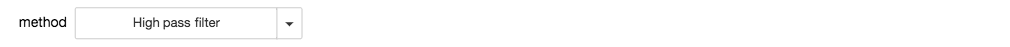

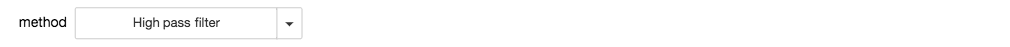

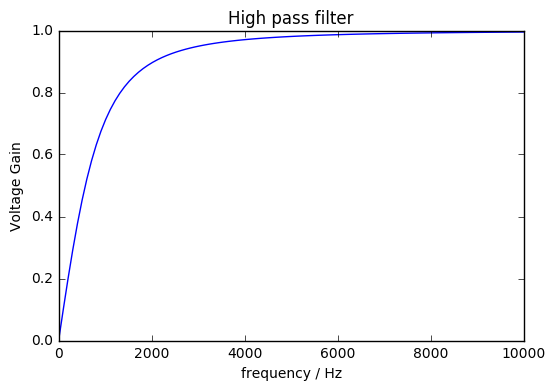

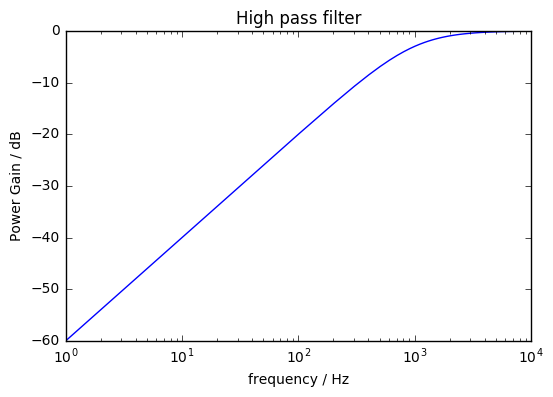

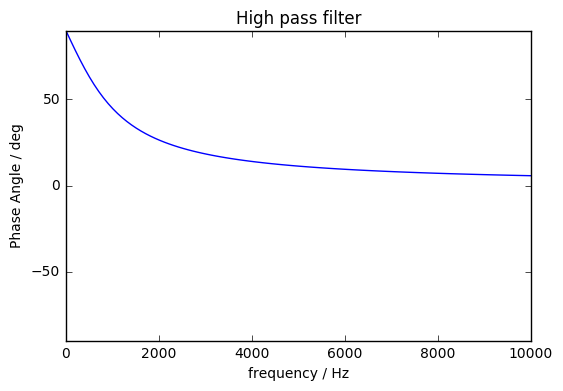

In [6]:
# Let's try an interactive notebook
from IPython.html.widgets import *

current_method = 'high pass filter'

# First introduce some variables common to all the cases
f = np.linspace(1, 10000, 100)
omega = 2*np.pi*f


def plot_gain(method):
    # Declare the global variables so we can avoid
    # re-running the simulation everytime
    global current_method

    # Get the simulation result
    if current_method is not method:
        # Obtain the correct gain
        gain_V = gain(method, omega)
        current_method = method

    # Plot
    PlotFilterResponses(f, gain_V, method)

# Implement the widget function
interact(plot_gain, method=('High pass filter', 'Low pass filter',
                            'Band pass filter'));

## Animation part starts here

First we need to import modules for animation

In [7]:
#for animation fun
from matplotlib import animation
from IPython.display import HTML

Now we declare the function that will do the animation. The animation will show $V_{in}$ and $V_{out}$ on the same graph. In order to do this we use `subplots`.

In [8]:
def animating(omega, t, gain_V):

    # Initialize the figure and axes
    fig = plt.figure(figsize=(8, 6))
    ax1 = plt.subplot(1, 1, 1)
    ax2 = plt.subplot(1, 1, 1)
    for ax in [ax1, ax2]:
        ax.set_xlim(0, max(t))
        ax.set_ylim(-1, 1)
    line1, = ax1.plot([], [], lw=2, label='V_in')
    line2, = ax2.plot([], [], lw=2, color='r', label='V_out')
    line = [line1, line2]
    
    # Set title and labels
    plt.title('animation')
    plt.xlabel('time')
    plt.ylabel('voltage')
    plt.legend()

    # Set initial plot
    def init():
        line[0].set_data([], [])
        line[1].set_data([], [])
        return line

    def animate_method(k, t, omega, gain_V):
        V_in = np.real(np.exp(1j*omega[k]*t))
        V_out = np.real(gain_V[k]*V_in)
        line[0].set_data(t, V_in)
        line[1].set_data(t, V_out)
        return line

    return animation.FuncAnimation(fig, animate_method, fargs=(t, omega, gain_V,), init_func=init,
                                   frames=100, interval=200, repeat=False, blit=True)

Now we initialise the animation. Currently `ipywidgets` (interactive IPython widgets for jupyter notbooks) do not support animation, so we have to choose between types of animations by simple uncommenting lines.

In [9]:
t=np.linspace(0,5/max(f),100)

# Set gain to the desired value by uncommenting ONE of the options
#gain_V = gain('Low pass filter', omega)
gain_V = gain('High pass filter', omega)
#gain_V = gain('Band pass filter', omega)

# Initialise the animation
anim = animating(omega, t, gain_V)
plt.close(anim._fig)
HTML(anim.to_html5_video())

Another way to approach the problem of interactive animations is to replace the animation with a slider widget. The solution is shown below:

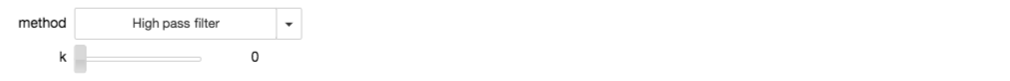

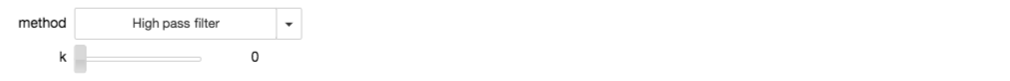

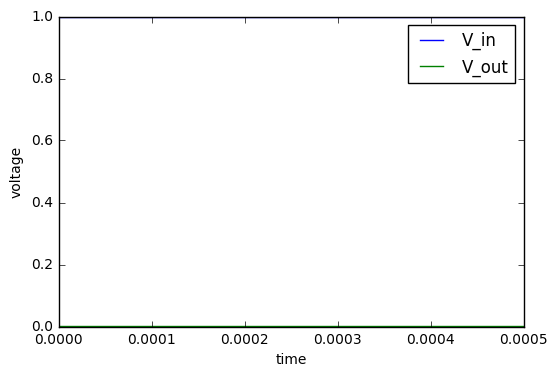

In [10]:
current_method = 'high pass filter'

def voltage_widget(method, k):
    # Declare the global variables so we can avoid
    # re-running the simulation everytime
    global current_method, gain_V

    # Get the simulation result
    if current_method is not method:
        # obtain gain
        gain_V = gain(method, omega)
        current_method = method
    
    # Obtain V_in and V_out
    V_in = np.real(np.exp(1j*omega[k]*t))
    V_out = np.real(gain_V[k]*V_in)
    
    # Plot graph of V_in and V_out
    plt.plot(t, V_in, label='V_in')
    plt.plot(t, V_out, label='V_out')
    
    # Set title and labels
    plt.xlabel('time')
    plt.ylabel('voltage')
    plt.legend()

# Implement the widget function
interact(voltage_widget, method=('High pass filter', 'Low pass filter','Band pass filter'),
         k = IntSlider(min=0, max=len(omega), step=0.1));